<h1 align="center" style="color:#FF0800">
 Обробка та аналіз БМД.<br>
 Группа: БС-83<br>
 Мельничук Я.O.<br>
 Практикум Номер 6<br\></h1>

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам

In [1]:
import scipy.stats as ss
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
table1=[]
table1 = [39.4,38.5,39.8,37.5,38.3,39.9,38.2,39.5,38.1,37.6,]
table2=[]
table2 = [37.7, 36.9, 37.4,37.5,36.8,37.5,37.1,36.9,37.5,36.6]
df = pd.DataFrame({
    'До прийому ліків': table1,
    'Після прийому ліків': table2
}, index=np.arange(1, len(table1)+1))
df.columns.name = 'Температура пацієнта, °C'
df.index.name = '№ пациента'
df

"Температура пацієнта, °C",До прийому ліків,Після прийому ліків
№ пациента,,
1,39.4,37.7
2,38.5,36.9
3,39.8,37.4
4,37.5,37.5
5,38.3,36.8
6,39.9,37.5
7,38.2,37.1
8,39.5,36.9
9,38.1,37.5


2. Побудувати графік, що відображає розкид даних в групах

[]

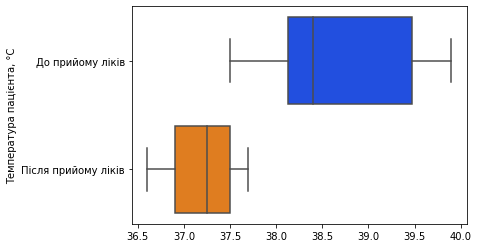

In [3]:
sns.boxplot(data=df, orient='h', palette='bright').set()

3. Написати функції:для оцінки зв'язку між групами за коефіцієнтом кореляції Пірсона. Функція має повертати значення коефіцієнту кореляції, значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

In [4]:
def mas(massiv,n):
    s1= 0
    for i in range(n):
        s1+=((massiv[i])**2)
    return s1
def Pirson(x, y):
    n = len(x)
    s1=sum(x)
    s2=sum(y)
    d=s1*s2
    k=0
    for i in range(n):
        k+=x[i]*y[i]
    s3=mas(x,n)
    s4=(sum(x))**2
    s5=mas(y,n)
    s6=((sum(y))**2)
    result=0
    p = ((n * k)-d)/(math.sqrt((n*s3-s4)*(n*s5-s6)))
    print('Отримане значення коефіцієнту кореляції Пірсона: p = ' + str(p))
    r= len(x)-2
    print('Значення ступеня свободи: r = ' + str(r))
    table = pd.read_excel("Таблица критических значений коэфициента корреляции Пирсона.xlsx").iloc[r-1, 1 ]
    print("Критичне значення коефіцієнту кореляції = " + str(table))
    if table<p:
        result = "Оскільки значення коефіцієнту кореляції Пірсона більше, ніж його критичне значення, то результат оцінки значимості зв'зку - significant"
    else:
        result = "Оскільки значення коефіцієнту кореляції Пірсона менше, ніж його критичне значення, то результат оцінки значимості зв'зку -  not significant"
    return result

In [5]:
def Student(x, y):
    n=len(x)
    d=[]*n
    for i in range(n):
        d.append(x[i] - y[i])
    M=sum(d)/n
    L=0
    for i in range(n):
        L += ((M-d[i])**2)
    sigma = math.sqrt((L)/(n-1))
    tmp = M/(sigma/math.sqrt(n))
    print('Отримане значення t-критерію Стьюдента:  ' + str(tmp))
    r = n - 1
    print('Значення ступеня свободи: r = ' + str(r))
    table = pd.read_excel("Таблица критических значений для парного критерия.xlsx").iloc[r-1, 1 ]
    print("Критичне значення коефіцієнту Стьюдента = " + str(table))
    if table<tmp:
        result = "Оскільки значення коефіцієнту Стьюдента більше, ніж його критичне значення, то результат оцінки значимості зв'зку - significant"
    else:
        result = "Оскільки значення коефіцієнту Стьюдента менше, ніж його критичне значення, то результат оцінки значимості зв'зку -  not significant"
    return result

In [6]:
Pirson(table1, table2)

Отримане значення коефіцієнту кореляції Пірсона: p = 0.3557448901725421
Значення ступеня свободи: r = 8
Критичне значення коефіцієнту кореляції = 0.6319


"Оскільки значення коефіцієнту кореляції Пірсона менше, ніж його критичне значення, то результат оцінки значимості зв'зку -  not significant"

In [7]:
Student(table1,table2)

Отримане значення t-критерію Стьюдента:  5.609896639472065
Значення ступеня свободи: r = 9
Критичне значення коефіцієнту Стьюдента = 2.262


"Оскільки значення коефіцієнту Стьюдента більше, ніж його критичне значення, то результат оцінки значимості зв'зку - significant"

Висновок: 


в результаті аналізу данних показників температури до та після прийому препарату виявлено:


1) Відсутність статистичної залежності.

2) Так як отримане значення критерію Стьюдента більше критичного, робимо висновок про наявність статистично значущих відмінностей до та після прийому нового препарату. Була прийнята альтернативна гіпотеза про відмінність середніх.